### PREGUNTA 3

La duración de la gestación humana se aproxima bien mediante una distribución normal con una media µ = 280 días y una desviación estándar σ = 8,5 días.

#### 1.  Realice graficas correspondiente a la función de densidad de probabilidad (pdf) y a la función de distribución acumulativa (cdf).

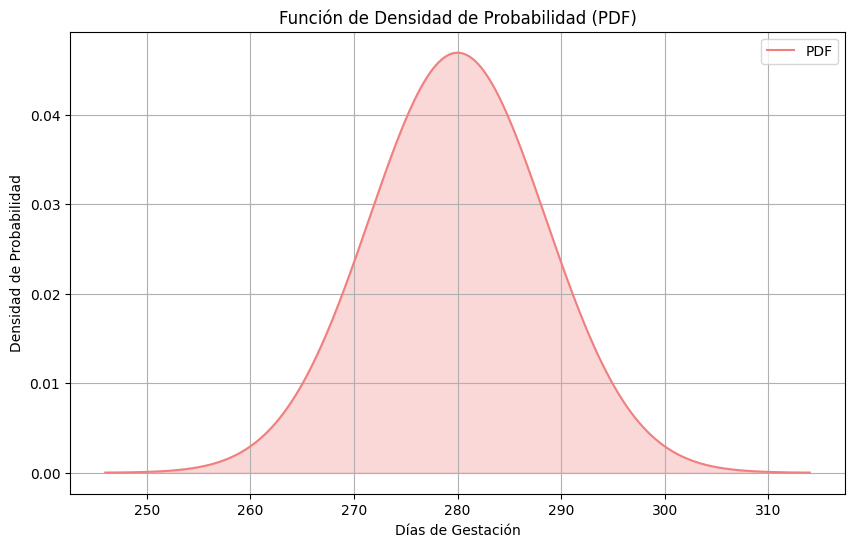

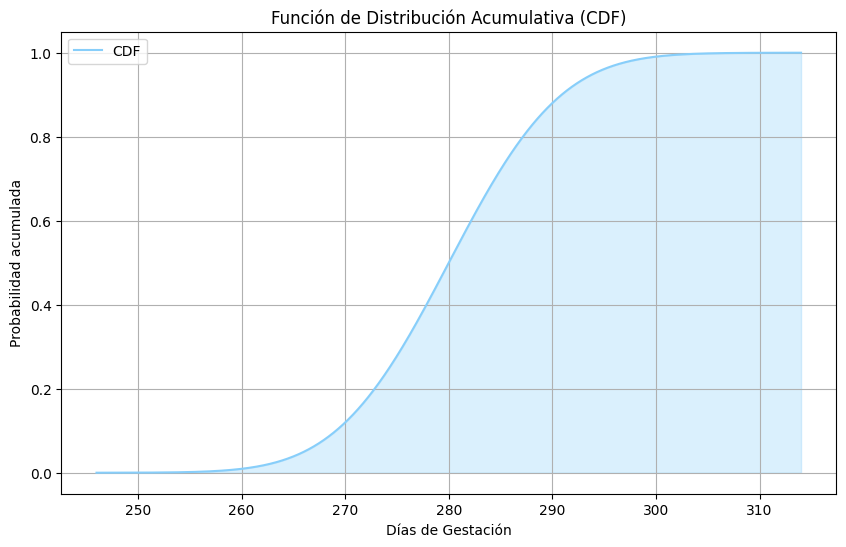

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def generar_distribucion_normal(mu, sigma):
    """
    Genera una distribución normal.

    Parámetros:
    mu (float): Media de la distribución.
    sigma (float): Desviación estándar de la distribución.

    Retorna:
    x (array): Valores del rango.
    pdf (array): Función de densidad de probabilidad.
    cdf (array): Función de distribución acumulativa.
    """
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    pdf = norm.pdf(x, mu, sigma)
    cdf = norm.cdf(x, mu, sigma)
    return x, pdf, cdf

def graficar_funcion(x, y, titulo, xlabel, ylabel, label, colorElegido):
    """
    Grafica una función.

    Parámetros:
    x (array): Valores en el eje x.
    y (array): Valores en el eje y.
    titulo (str): Título del gráfico.
    xlabel (str): Etiqueta del eje x.
    ylabel (str): Etiqueta del eje y.
    label (str): Etiqueta de la función.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=label, color=colorElegido)  # Color azul para las funciones
    plt.fill_between(x, y, color=colorElegido, alpha=0.3)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar

# Generar distribución normal
x, pdf, cdf = generar_distribucion_normal(mu, sigma)

# Graficar la función de densidad de probabilidad (PDF)
graficar_funcion(x, pdf, 'Función de Densidad de Probabilidad (PDF)', 'Días de Gestación', 'Densidad de Probabilidad', 'PDF', 'lightcoral')

# Graficar la función de distribución acumulativa (CDF)
graficar_funcion(x, cdf, 'Función de Distribución Acumulativa (CDF)', 'Días de Gestación', 'Probabilidad acumulada', 'CDF', 'lightskyblue')


#### 2.  Supongamos que tienes un examen final que está programado para el 19 de abril y tu profesora embarazada tiene una fecha de parto prevista para el 24 de abril. Encuentre la probabilidad de que dé a luz el mismo día del examen final o antes.

La probabilidad de que la profesora dé a luz antes o el día del examen final es: 27.82%


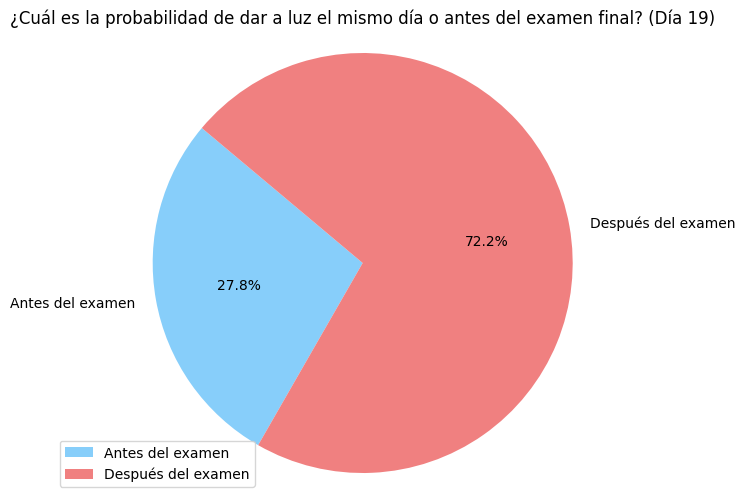

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt

def P_partoantesoeldiadelexamen(mu: float, sigma: float) -> float:
    """
    Calcula la probabilidad de que la profesora dé a luz el mismo día del examen final o antes.

    Args:
        mu (float): Media de la distribución normal.
        sigma (float): Desviación estándar de la distribución normal.

    Returns:
        float: Probabilidad de parto el mismo día o antes del examen final en forma de porcentaje.
    """
    # Calcular la probabilidad de que la profesora dé a luz en o antes de 275 días de gestación
    dia_parto_anticipado = 275  # 280 días - 5 días antes
    probabilidad_antes_examen = norm.cdf(dia_parto_anticipado, mu, sigma)

    return probabilidad_antes_examen

def graficar_probabilidad(probabilidad: float, fecha_examen: int):
    """
    Genera una gráfica de torta que muestra la probabilidad de parto antes o el mismo día del examen final.

    Args:
        probabilidad (float): Probabilidad de parto antes o el mismo día del examen final en forma de porcentaje.
        fecha_examen (int): Día del examen final.
    """
    # Calcular el porcentaje restante para representar la probabilidad de no dar a luz antes del examen
    probabilidad *= 100
    probabilidad_no_parto = 100 - probabilidad

    # Etiquetas para la gráfica
    etiquetas = ['Antes del examen', 'Después del examen']
    
    # Datos para la gráfica
    valores = [probabilidad, probabilidad_no_parto]

    # Crear la gráfica de torta
    plt.figure(figsize=(8, 6))
    colores = ['lightskyblue', 'lightcoral']
    plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
    plt.legend(loc="lower left", labels=etiquetas)
    plt.title('¿Cuál es la probabilidad de dar a luz el mismo día o antes del examen final? (Día {})'.format(fecha_examen))
    plt.axis('equal')
    plt.show()

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar
fecha_examen = 19  # Día del examen final

# Calcular P para el parto antes del examen final
probabilidad_antes = P_partoantesoeldiadelexamen(mu, sigma)

print("La probabilidad de que la profesora dé a luz antes o el día del examen final es: {:.2f}%".format(probabilidad_antes*100))

# Generar la gráfica de torta
graficar_probabilidad(probabilidad_antes, fecha_examen)


#### 3.  Encuentre la probabilidad de que dé a luz en abril después del examen.

Por esto entendemos que el rango por el que nos piden hallar la probabilidad de dar a luz se comprende entre el día 20 y 30 de abril = [20,30]

La probabilidad que de a luz despues del examen en abril: 44.09%


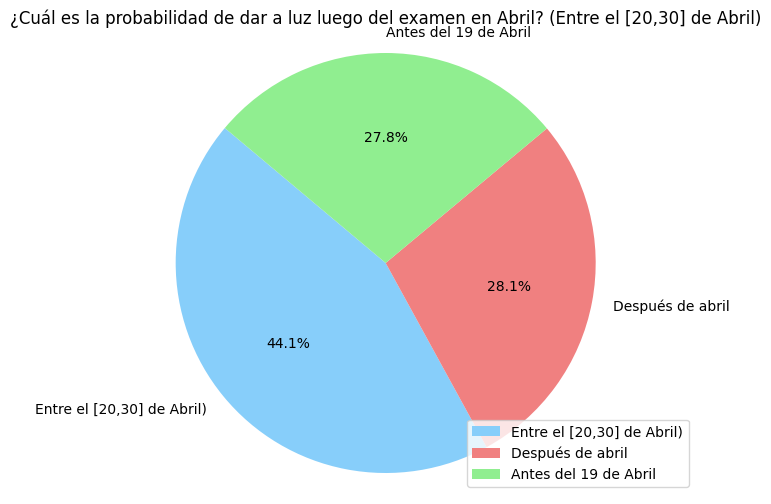

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 280  # Media
sigma = 8.5  # Desviación estándar
# Días de gestación entre el 20 de abril y 30 de abril
dias_despues_examen_inicio = 276  # 280 + (20 - 24)
dias_despues_examen_final = 286  # 280 + (30 - 24)

def P_partodespuesexamen(mu: float, sigma: float) -> float:
    """
    Calcula la probabilidad de que la profesora dé a luz después del examen final pero antes de que se acabe abril.
    """
    P_despues_examen = norm.cdf(dias_despues_examen_final, mu, sigma) - norm.cdf(dias_despues_examen_inicio, mu, sigma)
    print("La probabilidad que de a luz despues del examen en abril: {:.2f}%".format(P_despues_examen*100))
    return P_despues_examen

def graficar_probabilidad(probabilidad: float, probabilidad_antes: float):
    """
    Genera una gráfica de torta que muestra la probabilidad de parto después del examen en Abril.

    Args:
        probabilidad (float): Probabilidad de parto antes o el mismo día del examen final en forma de porcentaje.
    """
    # Calcular el porcentaje restante para representar la probabilidad de no dar a luz antes del examen
    probabilidad *= 100
    probabilidad_antes *= 100
    probabilidad_despues_abril = 100- (probabilidad+probabilidad_antes)

    # Etiquetas para la gráfica
    etiquetas = ['Entre el [20,30] de Abril)', 'Después de abril', 'Antes del 19 de Abril']
    
    # Datos para la gráfica
    valores = [probabilidad, probabilidad_despues_abril, probabilidad_antes]

    # Crear la gráfica de torta
    plt.figure(figsize=(8, 6))
    colores = ['lightskyblue', 'lightcoral', 'lightgreen']
    plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
    plt.legend(loc="lower right", labels=etiquetas)
    plt.title('¿Cuál es la probabilidad de dar a luz luego del examen en Abril? (Entre el [20,30] de Abril)')
    plt.axis('equal')
    plt.show()
    
probabilidad_despues = P_partodespuesexamen(mu, sigma)

graficar_probabilidad(probabilidad_despues,probabilidad_antes)


#### 4.  La profesora decide adelantar la fecha del examen para que haya un 95 % de probabilidad de que dé a luz después del examen. ¿Qué fecha debería elegir?

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Datos del problema
mu = 280  # media en días
sigma = 8.5  # desviación estándar en días

# Calcular el día de gestación que corresponde al percentil 5
dias_gestacion_percentil_5 = norm.ppf(0.05, mu, sigma)

# Convertir este día de gestación en una fecha respecto al 24 de abril (fecha de parto estimada)
# Si el día de gestación es menor que 280, calcular cuántos días antes del 24 de abril ocurre
dias_antes_parto = dias_gestacion_percentil_5 - 280
nueva_fecha_examen = 24 + dias_antes_parto  # Día del mes de abril
print("Para que la probabilidad de que la profesora de a luz antes del examen sea del 5%")
print(f"El examen debe ser reagendado para el: {int(nueva_fecha_examen)} de abril")

Para que la probabilidad de que la profesora de a luz antes del examen sea del 5%
El examen debe ser reagendado para el: 10 de abril
